# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy as pt 

In [2]:
hospital = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/refs/heads/master/hospital.csv")

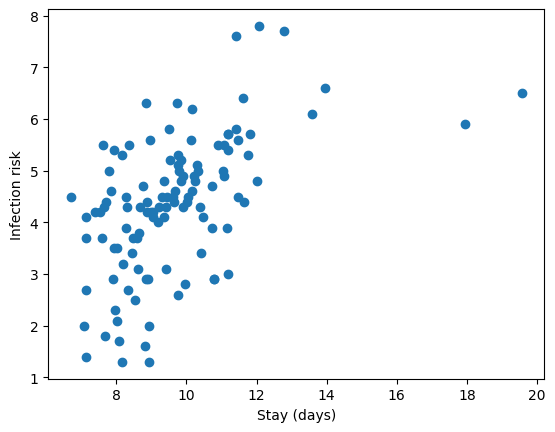

In [3]:
plt.scatter(hospital["stay"], hospital["infection_risk"])
plt.xlabel("Stay (days)")
plt.ylabel("Infection risk");

In [4]:
fit = smf.ols("infection_risk ~ nurses * stay", data = hospital).fit()
fit.summary()

Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 2.27e+04. This might indicate that there are strong multicollinearity or other numerical problems.

In [5]:
ndf = pd.DataFrame.from_dict({"stay": [20, 20], "nurses": [100, 101]})
np.diff(fit.predict(ndf))

array([-0.00447639])

For each extra nurse, when stay is equal to 20, we expect infection risk
to **decrease** by 0.004.

In [6]:
ndf = pd.DataFrame.from_dict({"stay": [10, 10], "nurses": [100, 101]})
np.diff(fit.predict(ndf))

array([0.00221305])

For each extra nurse, when stay is equal to 10, we expect infection risk
to **increase** by 0.002.

# Logistic Regression

In [7]:
# change hospital -> possum
possum = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/refs/heads/master/possum.csv")

In [8]:
possum["vic"] = (possum["pop"].astype("string") == "vic").astype(np.float64)

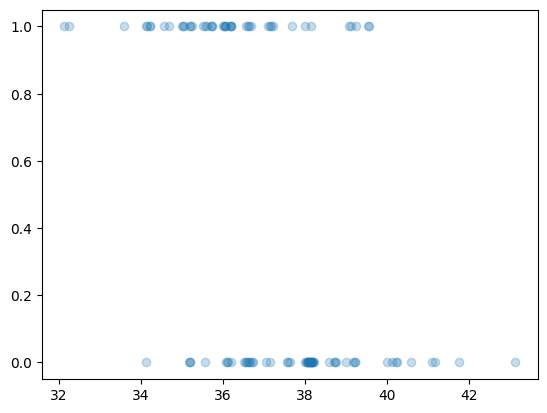

In [9]:
rng = np.random.default_rng()
N = np.shape(possum)[0]
plt.scatter(possum["tailL"] + rng.uniform(size = N) * 0.25, possum["vic"], 
            alpha = 0.25);

In [10]:
fit = smf.glm("vic ~ age * tailL", data = possum, 
              family = sm.families.Binomial()).fit()

In [11]:
fit.summary()

In [12]:
x = np.linspace(32, 44, 101)
m = np.mean(possum["age"])
ndf = pd.DataFrame.from_dict({"tailL": x, "age": np.full(101, m)})
yhat = fit.predict(ndf)

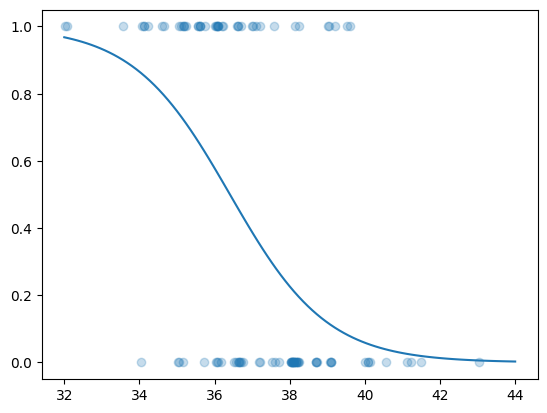

In [13]:
plt.scatter(possum["tailL"] + rng.uniform(size = N) * 0.25, possum["vic"], 
            alpha = 0.25);
plt.plot(x, yhat);

In [14]:
ndf = pd.DataFrame.from_dict({"tailL": [37, 38], "age": [m, m]})
np.diff(fit.predict(ndf))

array([-0.16145695])